In [5]:
import pandas as pd
cust_df = pd.read_csv('http://bit.ly/PMR-ch4') # describes customers of multichannel retailer and their transactions for 1 year along with their satisfaction.

In [6]:
cust_df.shape

(1000, 12)

In [7]:
cust_df.head()

,cust_id,age,credit_score,email,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
0,0,46.719825,735.837331,yes,9.186310,0,0,0.000000,1,33.603505,NaN,NaN
1,1,39.283359,656.599440,yes,0.781894,46,18,352.735573,0,0.000000,2.0,2.0
2,2,33.574168,665.934422,yes,1.204119,64,21,355.833505,6,162.685187,4.0,4.0
3,3,43.564256,718.456166,yes,9.736359,29,11,186.594784,1,51.327653,2.0,3.0
4,4,31.358552,626.323897,yes,33.782715,0,0,0.000000,0,0.000000,NaN,NaN


In [8]:
cust_df.dtypes

,0
cust_id,int64
age,float64
credit_score,float64
email,object
distance_to_store,float64
online_visits,int64
online_trans,int64
online_spend,float64
store_trans,int64
store_spend,float64


In [9]:
cust_df.dropna(inplace=True)

In [24]:
cust_df.email = cust_df.email.astype(pd.CategoricalDtype())
cust_df.email.head()

,email
1,yes
2,yes
3,yes
6,yes
7,yes


In [25]:
cust_df.cust_id = cust_df.cust_id.astype(pd.CategoricalDtype())
cust_df.cust_id.head()

,cust_id
1,1
2,2
3,3
6,6
7,7


<Axes: >

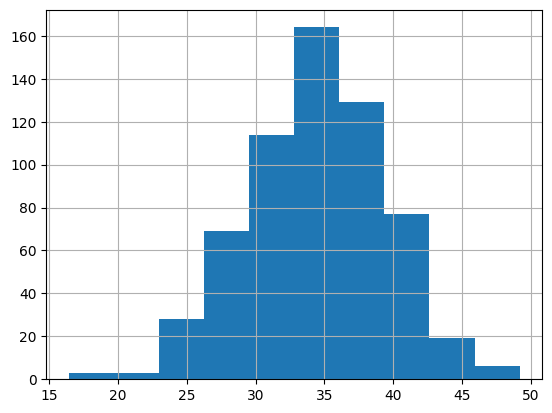

In [12]:
cust_df.age.hist()

## Exploring associations between variables with scatterplots




In [ ]:
cust_df.head()

In [ ]:
cust_df.dtypes

Text(0, 0.5, 'Score')

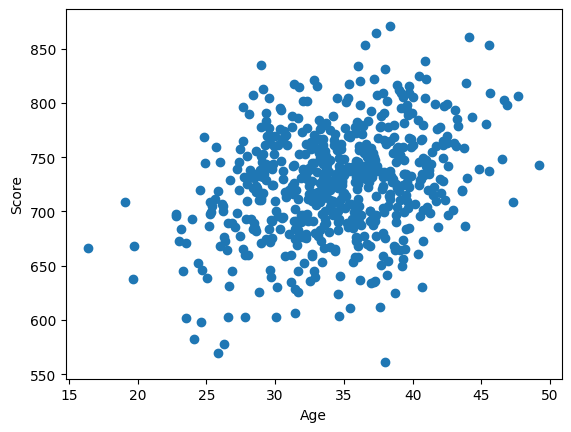

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x=cust_df['age'], y=cust_df['credit_score'])
plt.xlabel('Age')
plt.ylabel('Score')

Text(0, 0.5, 'Prior 12 months online sales ($)')

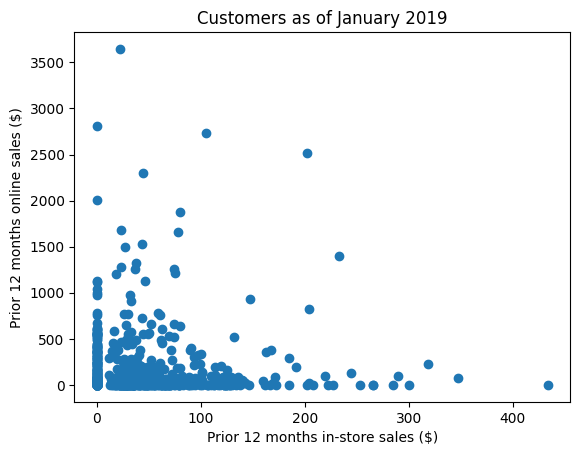

In [15]:
plt.scatter(x=cust_df['store_spend'], y=cust_df['online_spend'])
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales ($)')
plt.ylabel('Prior 12 months online sales ($)')

Text(0, 0.5, 'Count of customers')

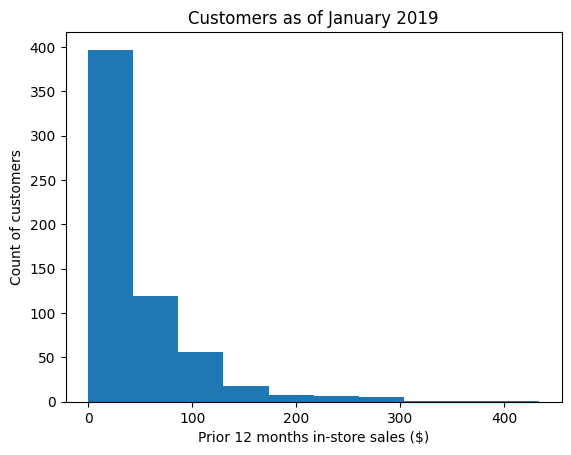

In [16]:
plt.hist(x=cust_df['store_spend'])
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales ($)')
plt.ylabel('Count of customers')

Text(0, 0.5, 'Count of customers')

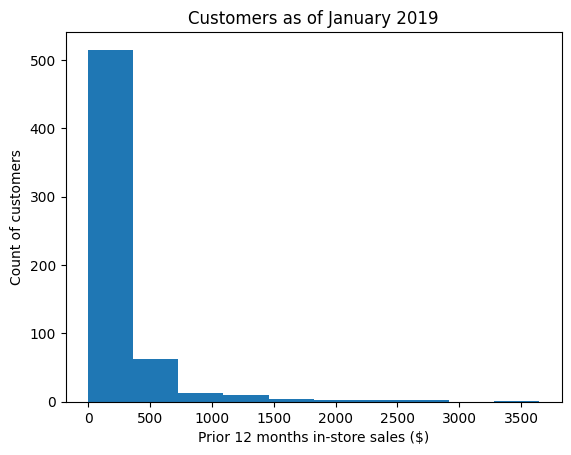

In [17]:
plt.hist(x=cust_df['online_spend'])
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales ($)')
plt.ylabel('Count of customers')

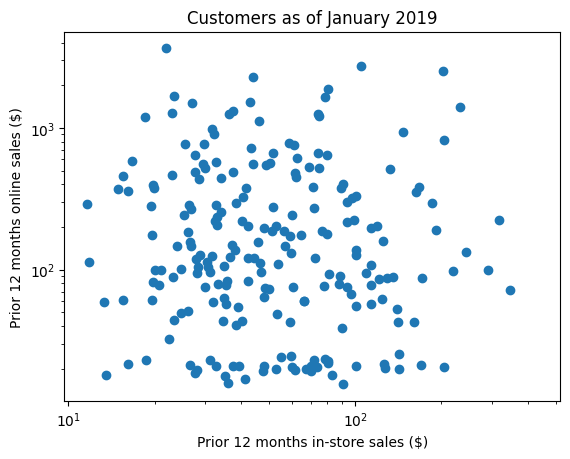

In [18]:
plt.scatter(x=cust_df['store_spend'], y=cust_df['online_spend'])
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales ($)')
plt.ylabel('Prior 12 months online sales ($)')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Spending')

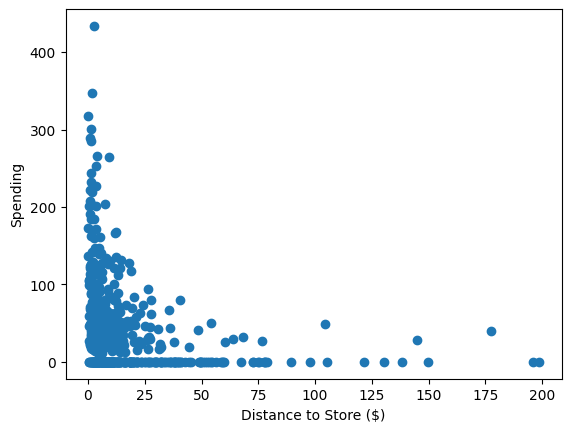

In [19]:
plt.scatter(x=cust_df['distance_to_store'], y=cust_df['store_spend'])
plt.xlabel('Distance to Store ($)')
plt.ylabel('Spending')

Text(0, 0.5, 'Spending')

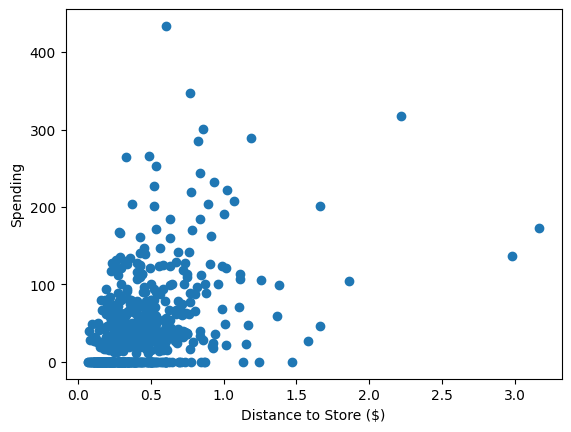

In [20]:
import numpy as np
plt.scatter(x=1/np.sqrt(cust_df['distance_to_store']), y=cust_df['store_spend'])
plt.xlabel('Distance to Store ($)')
plt.ylabel('Spending')

### scatter_matrix()

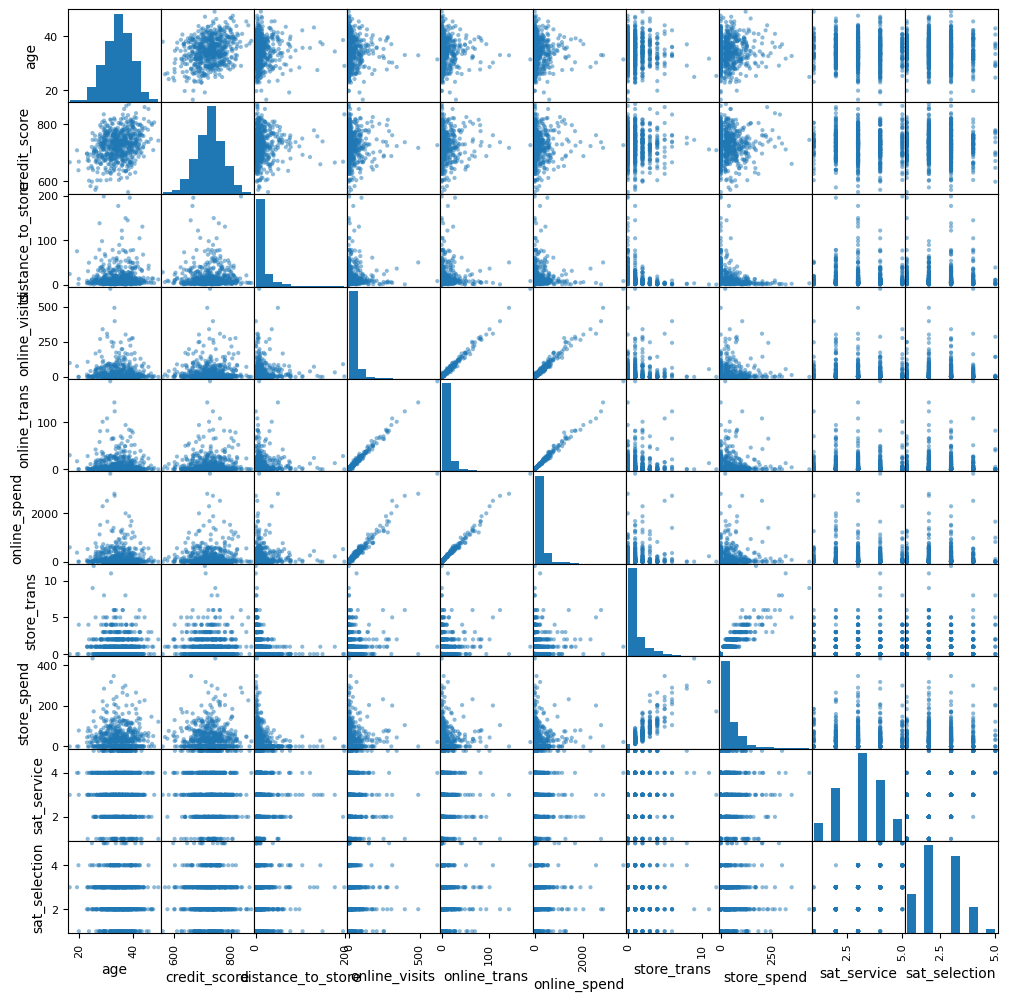

In [21]:
_ = pd.plotting.scatter_matrix(cust_df, figsize=(12,12))

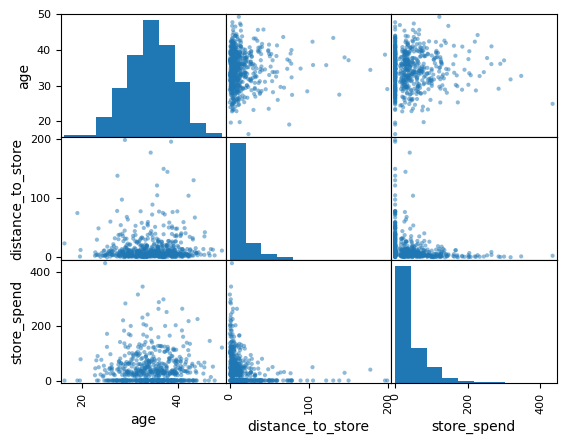

In [22]:
_ = pd.plotting.scatter_matrix(cust_df[['age', 'distance_to_store','store_spend']])

## Correlation coefficients

In [26]:
cust_df.corr()

ValueError: could not convert string to float: 'yes'

In [27]:
cust_df['email'] = cust_df['email'].cat.codes

In [28]:
cust_df.corr()

,cust_id,age,credit_score,email,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
cust_id,1.000000,0.014344,0.020608,-0.018863,0.028169,-0.034529,-0.037338,-0.039255,0.013422,0.022195,0.015505,0.038622
age,0.014344,1.000000,0.307675,-0.017369,0.025580,-0.047881,-0.041521,-0.042767,-0.049134,0.006283,-0.026356,-0.063342
credit_score,0.020608,0.307675,1.000000,0.038565,0.003942,0.020805,0.025181,0.029499,-0.004680,0.024341,-0.018062,-0.013233
email,-0.018863,-0.017369,0.038565,1.000000,0.022712,0.135478,0.134639,0.133097,-0.049867,-0.053073,0.011135,0.058779
distance_to_store,0.028169,0.025580,0.003942,0.022712,1.000000,0.017485,0.017008,0.011715,-0.283831,-0.259414,0.011372,-0.002108
online_visits,-0.034529,-0.047881,0.020805,0.135478,0.017485,1.000000,0.993188,0.984870,0.025172,-0.008170,-0.055680,0.043876
online_trans,-0.037338,-0.041521,0.025181,0.134639,0.017008,0.993188,1.000000,0.994284,0.018991,-0.014047,-0.049443,0.056386
online_spend,-0.039255,-0.042767,0.029499,0.133097,0.011715,0.984870,0.994284,1.000000,0.027658,-0.008574,-0.051517,0.056939
store_trans,0.013422,-0.049134,-0.004680,-0.049867,-0.283831,0.025172,0.018991,0.027658,1.000000,0.890682,0.000464,0.065107
store_spend,0.022195,0.006283,0.024341,-0.053073,-0.259414,-0.008170,-0.014047,-0.008574,0.890682,1.000000,-0.013511,0.059270


In [37]:
cust_df['log_store_spend'] = np.log(cust_df['store_spend']+1)
cust_df['log_online_spend'] = np.log(cust_df['online_spend']+1)

In [38]:
cust_df['log_store_spend'].corr(cust_df['log_online_spend'])

-0.07843054665205502

In [29]:
cust_df['age'].corr(cust_df['credit_score'])

0.30767531648609886

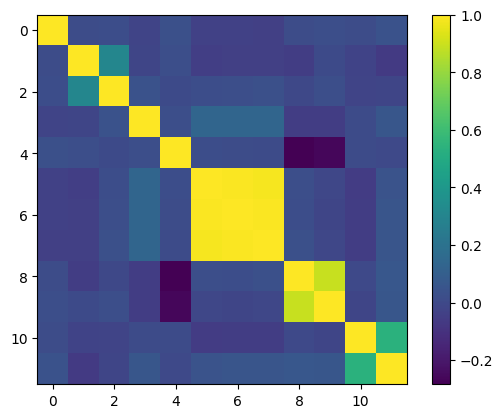

In [30]:
plt.imshow(cust_df.corr())
plt.colorbar()